In [ ]:
!ollama list

Classify Comments with Ollama

In [3]:
import pandas as pd
from ollama import chat

df = pd.read_csv("comments.csv")
results = []

for comment in df['comment']:
    prompt = f"Classify this customer comment as Positive, Negative, or Neutral:\n\n{comment}"
    resp = chat(model="gpt-oss:20b", messages=[{"role": "user", "content": prompt}])
    sentiment = resp['message']['content'].strip()
    results.append({"comment": comment, "sentiment": sentiment})

pd.DataFrame(results).to_csv("sentiment_results.csv", index=False)
print("Saved sentiment_results.csv")


Saved sentiment_results.csv


Plot the Sentiment Counts

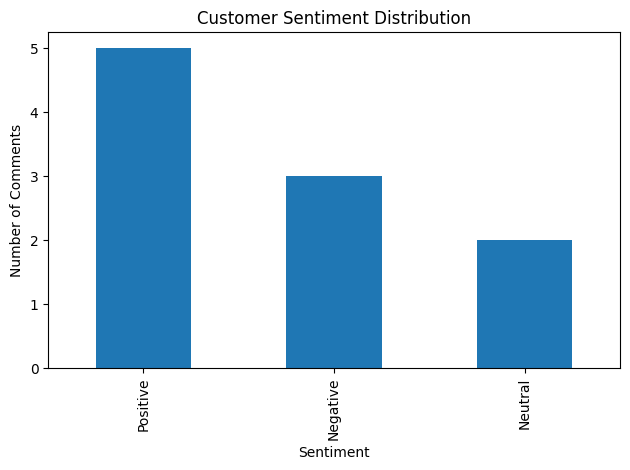

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("sentiment_results.csv")
counts = df['sentiment'].value_counts()

counts.plot(kind='bar', title='Customer Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.tight_layout()
plt.savefig('sentiment_bar.png')
plt.show()


AI-Generated Summary

In [6]:
from ollama import chat
summary_prompt = f"Here is the sentiment count data: {counts.to_dict()}. Summarize it in 2-3 sentences."
resp = chat(model="gpt-oss:20b", messages=[{"role":"user","content":summary_prompt}])
print(resp['message']['content'])


The sentiment analysis shows a clear tilt toward positivity, with 5 positive mentions compared to 3 negative and 2 neutral ones. Overall, the majority of responses are upbeat, indicating a generally favorable outlook. The relatively small number of negative comments suggests a largely positive reception, though a few concerns or criticisms are also present.


Quarto Report

In [5]:
---
title: "Customer Sentiment Analysis"
format: html
---

## Sentiment Distribution

```{python}
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("sentiment_results.csv")
counts = df['sentiment'].value_counts()
counts.plot(kind='bar', title='Customer Sentiment Distribution')


SyntaxError: invalid syntax (858416061.py, line 1)